### Imports

In [6]:
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt

### Data preprocessing

In [19]:
# Load training data
data_train = pd.read_csv('iris_train.csv')

print(data_train)

     sepal_length  sepal_width  petal_length  petal_width          species
0             5.1          3.4           1.5          0.2      Iris-setosa
1             6.3          2.5           5.0          1.9   Iris-virginica
2             5.9          3.0           4.2          1.5  Iris-versicolor
3             5.7          2.6           3.5          1.0  Iris-versicolor
4             7.7          2.8           6.7          2.0   Iris-virginica
..            ...          ...           ...          ...              ...
115           5.6          2.5           3.9          1.1  Iris-versicolor
116           6.4          2.9           4.3          1.3  Iris-versicolor
117           7.9          3.8           6.4          2.0   Iris-virginica
118           5.4          3.0           4.5          1.5  Iris-versicolor
119           5.5          3.5           1.3          0.2      Iris-setosa

[120 rows x 5 columns]


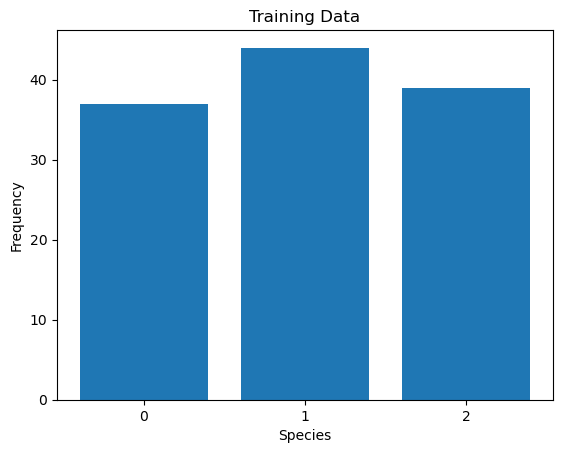

In [20]:
# Convert string target values to numeric values
#       class 0: Iris-setosa
#       class 1: Iris-versicolor
#       class 2: Iris-virginica
data_train['species'] = data_train['species'].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})

# also convert all string numeric values to float ['2' -> 2.0]
data_train = data_train.apply(pd.to_numeric)

# extract frequency of each species class
class_freq = data_train['species'].value_counts()
class_freq = list(class_freq.sort_index())

# Visual data
graph = plt.bar(list(range(0,3)), class_freq)
plt.xticks(list(range(0,3)))
plt.ylabel('Frequency')
plt.xlabel('Species')
plt.title('Training Data')

plt.show()

In [18]:
# Preprocess data for training

# Convert pandas dataframe to array
data_train_array = data_train.values

# Split x (features) and y (targets)
x_array = data_train_array[:, :4]
y_array = data_train_array[:, 4]

# Tensorify
X = torch.tensor(x_array, dtype=torch.float)
Y = torch.tensor(y_array, dtype=torch.long)

print(X.shape)

torch.Size([120, 4])


### Network Setup

In [66]:
# Network architecture (MLP, 1 hidden layer): layer sizes
# Note: will stick to 1 hidden layer for iris, will set up nb of hidden layers as hyperparam for larger dataset
INPUT_NEURONS = 4
hidden_neurons_range = [10] # hidden layer 1
OUTPUT_NEURONS = 3

In [60]:
# Network architecutre: activation functions

# Normal network with sigmoid
def create_standard_sigmoid_network(hidden_neurons):
    return torch.nn.Sequential(
        torch.nn.Linear(INPUT_NEURONS, hidden_neurons),
        torch.nn.Sigmoid(),
        torch.nn.Linear(hidden_neurons, OUTPUT_NEURONS)
    )

# Normal network with relu
def create_standard_relu_network(hidden_neurons):
    return torch.nn.Sequential(
        torch.nn.Linear(INPUT_NEURONS, hidden_neurons),
        torch.nn.ReLU(),
        torch.nn.Linear(hidden_neurons, OUTPUT_NEURONS)
    )

network_funs = [
    ("standard_sigmoid", create_standard_sigmoid_network),
    ("standard_relu", create_standard_relu_network),
]

### Train and Plot Losses

In [61]:
# Training hyperparameters
# Training constants
lr_range = [rate for rate in np.logspace(-4,-1,num=5,base=10.0)]
NUM_EPOCH = 500

# Loss function -> could be hyperparam too
loss_func = torch.nn.CrossEntropyLoss()

Network: standard_sigmoid, HIDDEN_NEURONS: 10, LR: 0.0001 
Epoch [1 / 500] Loss: 1.2109  Accuracy: 30.83 %
Epoch [51 / 500] Loss: 1.2087  Accuracy: 30.83 %
Epoch [101 / 500] Loss: 1.2065  Accuracy: 30.83 %
Epoch [151 / 500] Loss: 1.2044  Accuracy: 30.83 %
Epoch [201 / 500] Loss: 1.2023  Accuracy: 30.83 %
Epoch [251 / 500] Loss: 1.2002  Accuracy: 30.83 %
Epoch [301 / 500] Loss: 1.1982  Accuracy: 30.83 %
Epoch [351 / 500] Loss: 1.1962  Accuracy: 30.83 %
Epoch [401 / 500] Loss: 1.1942  Accuracy: 30.83 %
Epoch [451 / 500] Loss: 1.1923  Accuracy: 30.83 %


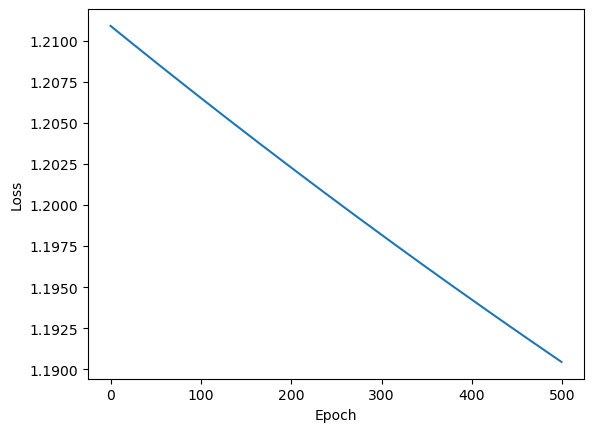

Network: standard_sigmoid, HIDDEN_NEURONS: 10, LR: 0.0005623413251903491 
Epoch [1 / 500] Loss: 1.1824  Accuracy: 30.83 %
Epoch [51 / 500] Loss: 1.1686  Accuracy: 30.83 %
Epoch [101 / 500] Loss: 1.1561  Accuracy: 30.83 %
Epoch [151 / 500] Loss: 1.1447  Accuracy: 30.83 %
Epoch [201 / 500] Loss: 1.1343  Accuracy: 31.67 %
Epoch [251 / 500] Loss: 1.1249  Accuracy: 35.00 %
Epoch [301 / 500] Loss: 1.1163  Accuracy: 39.17 %
Epoch [351 / 500] Loss: 1.1085  Accuracy: 52.50 %
Epoch [401 / 500] Loss: 1.1014  Accuracy: 59.17 %
Epoch [451 / 500] Loss: 1.0948  Accuracy: 63.33 %


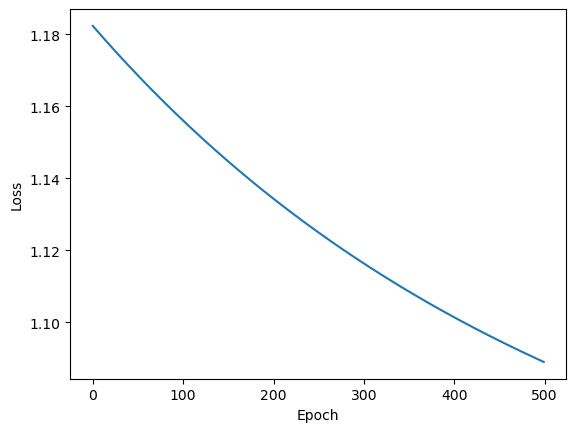

Network: standard_sigmoid, HIDDEN_NEURONS: 10, LR: 0.0031622776601683794 
Epoch [1 / 500] Loss: 1.2097  Accuracy: 30.83 %
Epoch [51 / 500] Loss: 1.1705  Accuracy: 30.83 %
Epoch [101 / 500] Loss: 1.1447  Accuracy: 30.00 %
Epoch [151 / 500] Loss: 1.1275  Accuracy: 0.00 %
Epoch [201 / 500] Loss: 1.1157  Accuracy: 0.00 %
Epoch [251 / 500] Loss: 1.1073  Accuracy: 21.67 %
Epoch [301 / 500] Loss: 1.1012  Accuracy: 36.67 %
Epoch [351 / 500] Loss: 1.0964  Accuracy: 36.67 %
Epoch [401 / 500] Loss: 1.0925  Accuracy: 36.67 %
Epoch [451 / 500] Loss: 1.0891  Accuracy: 36.67 %


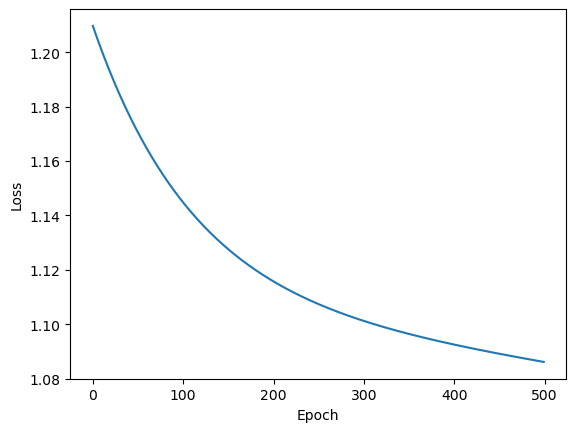

Network: standard_sigmoid, HIDDEN_NEURONS: 10, LR: 0.01778279410038923 
Epoch [1 / 500] Loss: 1.0925  Accuracy: 32.50 %
Epoch [51 / 500] Loss: 1.0329  Accuracy: 60.00 %
Epoch [101 / 500] Loss: 0.9956  Accuracy: 43.33 %
Epoch [151 / 500] Loss: 0.9614  Accuracy: 70.00 %
Epoch [201 / 500] Loss: 0.9245  Accuracy: 82.50 %
Epoch [251 / 500] Loss: 0.8845  Accuracy: 83.33 %
Epoch [301 / 500] Loss: 0.8432  Accuracy: 84.17 %
Epoch [351 / 500] Loss: 0.8028  Accuracy: 85.83 %
Epoch [401 / 500] Loss: 0.7646  Accuracy: 87.50 %
Epoch [451 / 500] Loss: 0.7291  Accuracy: 88.33 %


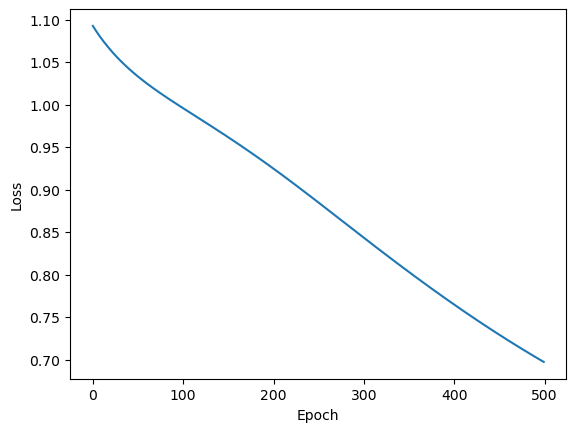

Network: standard_sigmoid, HIDDEN_NEURONS: 10, LR: 0.1 
Epoch [1 / 500] Loss: 1.1525  Accuracy: 30.83 %
Epoch [51 / 500] Loss: 0.8306  Accuracy: 92.50 %
Epoch [101 / 500] Loss: 0.6179  Accuracy: 95.83 %
Epoch [151 / 500] Loss: 0.5121  Accuracy: 97.50 %
Epoch [201 / 500] Loss: 0.4506  Accuracy: 98.33 %
Epoch [251 / 500] Loss: 0.4019  Accuracy: 98.33 %
Epoch [301 / 500] Loss: 0.3582  Accuracy: 98.33 %
Epoch [351 / 500] Loss: 0.3188  Accuracy: 98.33 %
Epoch [401 / 500] Loss: 0.2842  Accuracy: 98.33 %
Epoch [451 / 500] Loss: 0.2546  Accuracy: 98.33 %


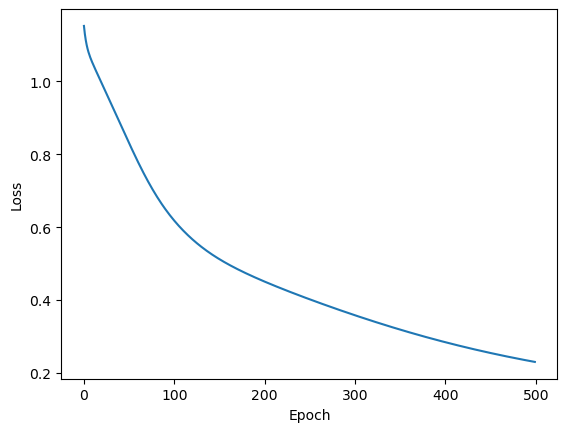

Network: standard_relu, HIDDEN_NEURONS: 10, LR: 0.0001 
Epoch [1 / 500] Loss: 1.1686  Accuracy: 36.67 %
Epoch [51 / 500] Loss: 1.1503  Accuracy: 36.67 %
Epoch [101 / 500] Loss: 1.1340  Accuracy: 36.67 %
Epoch [151 / 500] Loss: 1.1197  Accuracy: 36.67 %
Epoch [201 / 500] Loss: 1.1071  Accuracy: 36.67 %
Epoch [251 / 500] Loss: 1.0960  Accuracy: 36.67 %
Epoch [301 / 500] Loss: 1.0864  Accuracy: 36.67 %
Epoch [351 / 500] Loss: 1.0779  Accuracy: 36.67 %
Epoch [401 / 500] Loss: 1.0703  Accuracy: 36.67 %
Epoch [451 / 500] Loss: 1.0636  Accuracy: 36.67 %


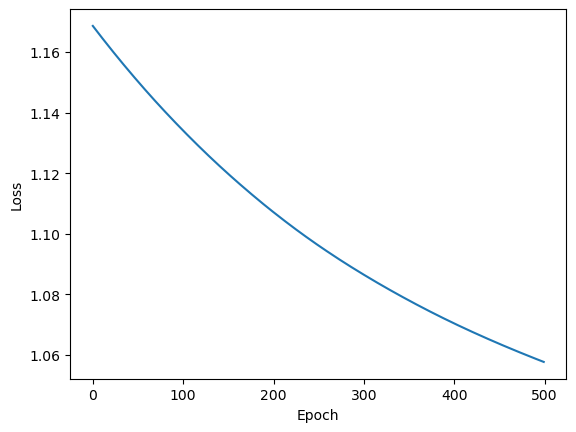

Network: standard_relu, HIDDEN_NEURONS: 10, LR: 0.0005623413251903491 
Epoch [1 / 500] Loss: 1.2965  Accuracy: 32.50 %
Epoch [51 / 500] Loss: 1.1771  Accuracy: 32.50 %
Epoch [101 / 500] Loss: 1.0977  Accuracy: 32.50 %
Epoch [151 / 500] Loss: 1.0470  Accuracy: 33.33 %
Epoch [201 / 500] Loss: 1.0149  Accuracy: 34.17 %
Epoch [251 / 500] Loss: 0.9935  Accuracy: 35.83 %
Epoch [301 / 500] Loss: 0.9781  Accuracy: 36.67 %
Epoch [351 / 500] Loss: 0.9658  Accuracy: 36.67 %
Epoch [401 / 500] Loss: 0.9552  Accuracy: 39.17 %
Epoch [451 / 500] Loss: 0.9454  Accuracy: 43.33 %


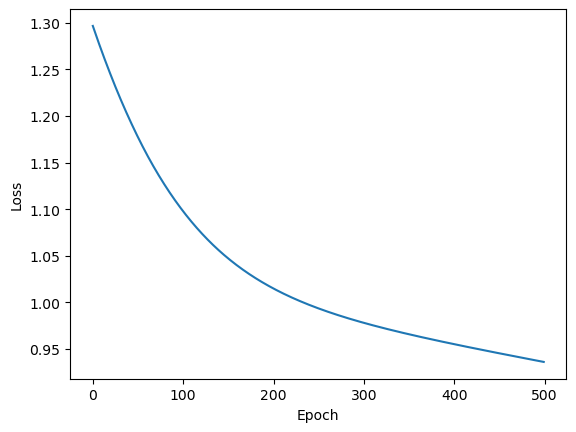

Network: standard_relu, HIDDEN_NEURONS: 10, LR: 0.0031622776601683794 
Epoch [1 / 500] Loss: 1.2933  Accuracy: 32.50 %
Epoch [51 / 500] Loss: 1.0150  Accuracy: 32.50 %
Epoch [101 / 500] Loss: 0.9540  Accuracy: 68.33 %
Epoch [151 / 500] Loss: 0.9051  Accuracy: 82.50 %
Epoch [201 / 500] Loss: 0.8595  Accuracy: 85.00 %
Epoch [251 / 500] Loss: 0.8159  Accuracy: 85.00 %
Epoch [301 / 500] Loss: 0.7743  Accuracy: 85.83 %
Epoch [351 / 500] Loss: 0.7351  Accuracy: 87.50 %
Epoch [401 / 500] Loss: 0.6987  Accuracy: 87.50 %
Epoch [451 / 500] Loss: 0.6654  Accuracy: 88.33 %


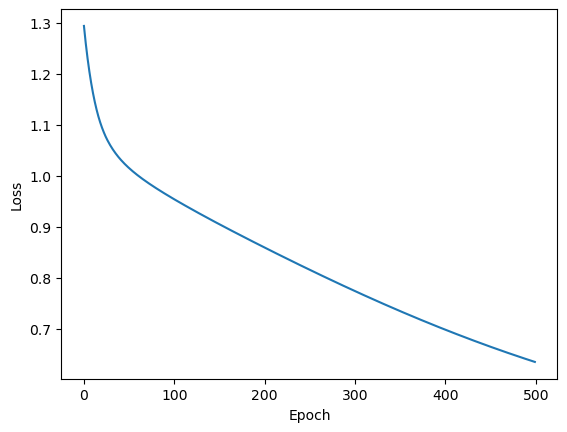

Network: standard_relu, HIDDEN_NEURONS: 10, LR: 0.01778279410038923 
Epoch [1 / 500] Loss: 2.3070  Accuracy: 30.83 %
Epoch [51 / 500] Loss: 0.8724  Accuracy: 69.17 %
Epoch [101 / 500] Loss: 0.6806  Accuracy: 76.67 %
Epoch [151 / 500] Loss: 0.5540  Accuracy: 91.67 %
Epoch [201 / 500] Loss: 0.4774  Accuracy: 95.83 %
Epoch [251 / 500] Loss: 0.4224  Accuracy: 97.50 %
Epoch [301 / 500] Loss: 0.3768  Accuracy: 97.50 %
Epoch [351 / 500] Loss: 0.3369  Accuracy: 97.50 %
Epoch [401 / 500] Loss: 0.3015  Accuracy: 97.50 %
Epoch [451 / 500] Loss: 0.2707  Accuracy: 97.50 %


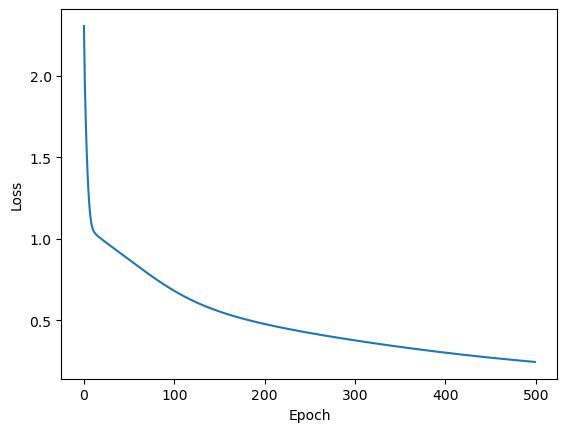

Network: standard_relu, HIDDEN_NEURONS: 10, LR: 0.1 
Epoch [1 / 500] Loss: 1.4246  Accuracy: 32.50 %
Epoch [51 / 500] Loss: 0.3805  Accuracy: 92.50 %
Epoch [101 / 500] Loss: 0.3756  Accuracy: 75.83 %
Epoch [151 / 500] Loss: 0.3185  Accuracy: 84.17 %
Epoch [201 / 500] Loss: 0.2473  Accuracy: 90.83 %
Epoch [251 / 500] Loss: 0.1677  Accuracy: 94.17 %
Epoch [301 / 500] Loss: 0.2242  Accuracy: 90.83 %
Epoch [351 / 500] Loss: 0.1940  Accuracy: 92.50 %
Epoch [401 / 500] Loss: 0.1097  Accuracy: 95.83 %
Epoch [451 / 500] Loss: 0.1165  Accuracy: 95.83 %


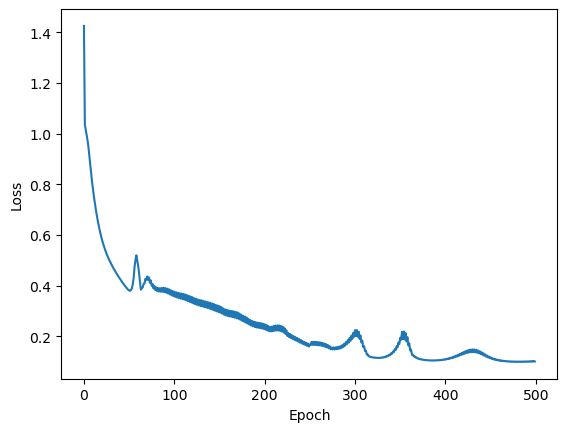

In [67]:
# Train each network and plot the loss
for name, network_fun in network_funs:
    for hidden_neurons in hidden_neurons_range:
        for lr in lr_range:
            print(f"Network: {name}, HIDDEN_NEURONS: {hidden_neurons}, LR: {lr} \n=========")

            # Create new instance of network
            network = network_fun(hidden_neurons)

            # Optimiser
            optimiser = torch.optim.SGD(network.parameters(), lr=lr)

            # store all losses for visualisation
            all_losses = []

            # train a neural network
            for epoch in range(NUM_EPOCH):
                # Perform forward pass
                Y_pred = network(X)
                # Compute loss
                loss = loss_func(Y_pred, Y)
                all_losses.append(loss.item())

                # print progress
                if epoch % 50 == 0:
                    # convert three-column predicted Y values to one column for comparison
                    _, predicted = torch.max(torch.nn.functional.softmax(Y_pred,1), 1)
                    # calculate and print accuracy
                    total = predicted.size(0)
                    correct = predicted.data.numpy() == Y.data.numpy()
                    # Print
                    print('Epoch [%d / %d] Loss: %.4f  Accuracy: %.2f %%'
                        % (epoch + 1, NUM_EPOCH, loss.item(), 100 * sum(correct)/total))

                # Clear the gradients before running the backward pass.
                network.zero_grad()
                # Perform backward pass
                loss.backward()
                # Step optimiser
                optimiser.step()

            # Plot
            plt.figure()
            plt.plot(all_losses)
            plt.xlabel("Epoch")
            plt.ylabel("Loss")
            plt.show()